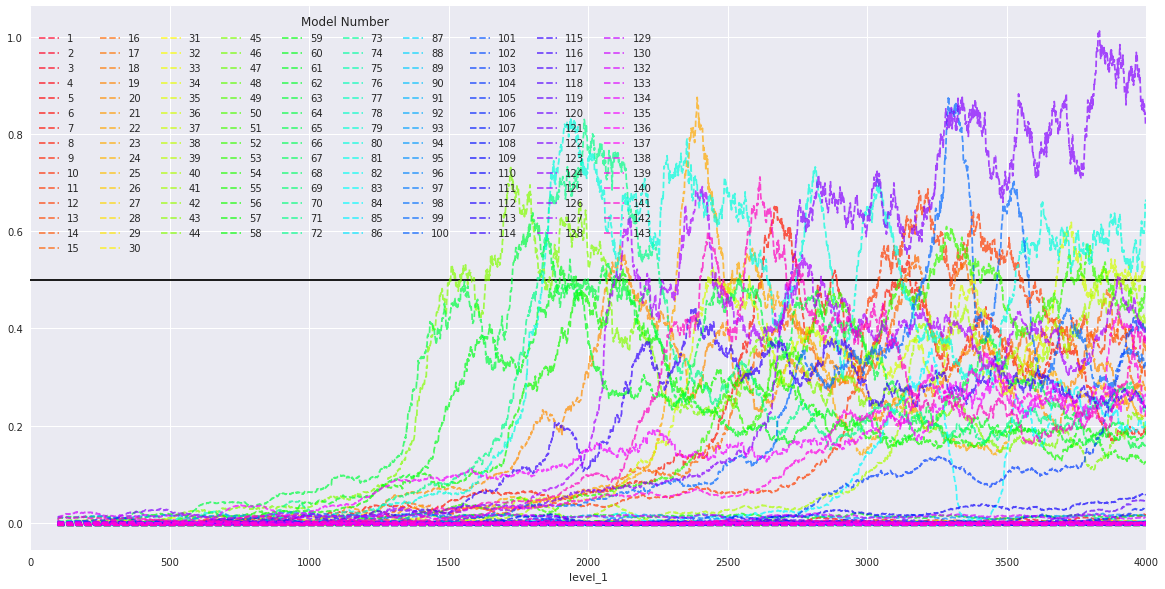

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
sns.set()
import json

params = !ls results-tennis/*/*.json
scores = !find results-tennis/*/*.csv


dfs = []
for file in scores:
    name = file.split('/')[1].split('-')[1]
    df = pd.read_csv(file)
    df['trial'] = int(name)
    dfs.append(df)
    
df = pd.concat(dfs)
means = df.groupby('trial')['score','episode'].rolling(100).mean().reset_index()

fig, ax = plt.subplots(1, figsize=(20,10))

cmap = plt.cm.gist_rainbow

ax.set_color_cycle([cmap(i) for i in np.linspace(0, 1, len(scores))])
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_prop_cycle.html

winning_iteration = []
max_mean_score = []
for idx, group in enumerate(means.groupby('trial')):
    group[1].plot(x='level_1', y='score',ax=ax, label=group[0], linestyle='--', alpha=0.7)
    try:
        winning_iteration.append([group[0], group[1][group[1]['score'] >= 0.5]['level_1'].iloc[0]])
    except:
        winning_iteration.append([group[0], np.nan])
    max_mean_score.append([group[0], group[1].score.max()])

winning_iteration = pd.DataFrame(winning_iteration, columns=['model_num', 'win_iter'])
max_mean_score = pd.DataFrame(max_mean_score, columns=['model_num', 'max_mean_score'])

legend = plt.legend(title="Model Number", ncol=10, fontsize='small', fancybox=True)
plt.xlim(0,4001)
plt.hlines(0.5, 0, 4000)
plt.xlim(0,4000)
plt.show()

In [8]:
winning_ave = winning_iteration.copy()

winning_ave['model'] = [int(str(x)[:-2]) for x in winning_ave['model_num']]
print (winning_ave.groupby('model')['win_iter'].mean().sort_values())
winning_ave.groupby('model')['win_iter'].describe().sort_values('mean')

model
71     2183.500000
44     2286.500000
60     2471.000000
80     2606.500000
64     3090.333333
22             NaN
70             NaN
79             NaN
98             NaN
122            NaN
Name: win_iter, dtype: float64


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
71,4.0,2183.500000,544.681252,1406.0,2006.00,2382.5,2560.00,2563.0
44,2.0,2286.500000,787.009847,1730.0,2008.25,2286.5,2564.75,2843.0
60,2.0,2471.000000,94.752309,2404.0,2437.50,2471.0,2504.50,2538.0
80,4.0,2606.500000,599.126308,2138.0,2150.00,2441.5,2898.00,3405.0
64,3.0,3090.333333,388.435752,2769.0,2874.50,2980.0,3251.00,3522.0
22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:


df_params = []
for p in params:
    with open(p, 'r') as f:
        temp_df = pd.DataFrame(json.load(f), index=[0])
        temp_df['model'] = p.split('/')[1]
        df_params.append(temp_df)
        
        
df_params = pd.concat(df_params)
df_params['model_num'] = df_params['model_num'].astype(int)
df_params['GAMMA'] = df_params['GAMMA'].astype(float)

data = pd.merge(df_params, winning_iteration, on='model_num')

skip_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        skip_cols.append(col)
        
data = data.drop(skip_cols + ['model_num'], axis=1)
data.set_index('model', inplace=True)


print data.columns

data = data.sort_values('win_iter')

print data.head()

max_mean_score.sort_values('max_mean_score', ascending=False).head()

Index([u'GAMMA', u'LR_ACTOR', u'LR_CRITIC', u'fc1_units', u'fc2_units',
       u'win_iter'],
      dtype='object')
          GAMMA LR_ACTOR LR_CRITIC fc1_units fc2_units  win_iter
model                                                           
model-44   0.97   0.0001    0.0001       100       200    1505.0
model-64   0.97   0.0001    0.0001       400       100    1727.0
model-71   0.97   0.0001    0.0001       400       400    1819.0
model-80   0.99   0.0001    0.0001       100       200    1839.0
model-60   0.97   0.0001    0.0001       200       400    1899.0


,model_num,max_mean_score
122,123,1.01255
98,99,0.87680
22,23,0.87585
79,80,0.83115
70,71,0.83045


In [ ]:


df_params = []
for p in params:
    with open(p, 'r') as f:
        temp_df = pd.DataFrame(json.load(f), index=[0])
        temp_df['model'] = p.split('/')[1]
        df_params.append(temp_df)
        
        
df_params = pd.concat(df_params)
df_params['model_num'] = df_params['model_num'].astype(int)
df_params['GAMMA'] = df_params['GAMMA'].astype(float)

data = pd.merge(df_params, winning_iteration, on='model_num')

skip_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        skip_cols.append(col)
        
data = data.drop(skip_cols + ['model_num'], axis=1)
data.set_index('model', inplace=True)


print data.columns

data = data.sort_values('win_iter')

print data.head()

max_mean_score